In [336]:
from nanoact import nanoact
#Reload the module
import importlib
importlib.reload(nanoact)
dumb = nanoact.NanoAct()

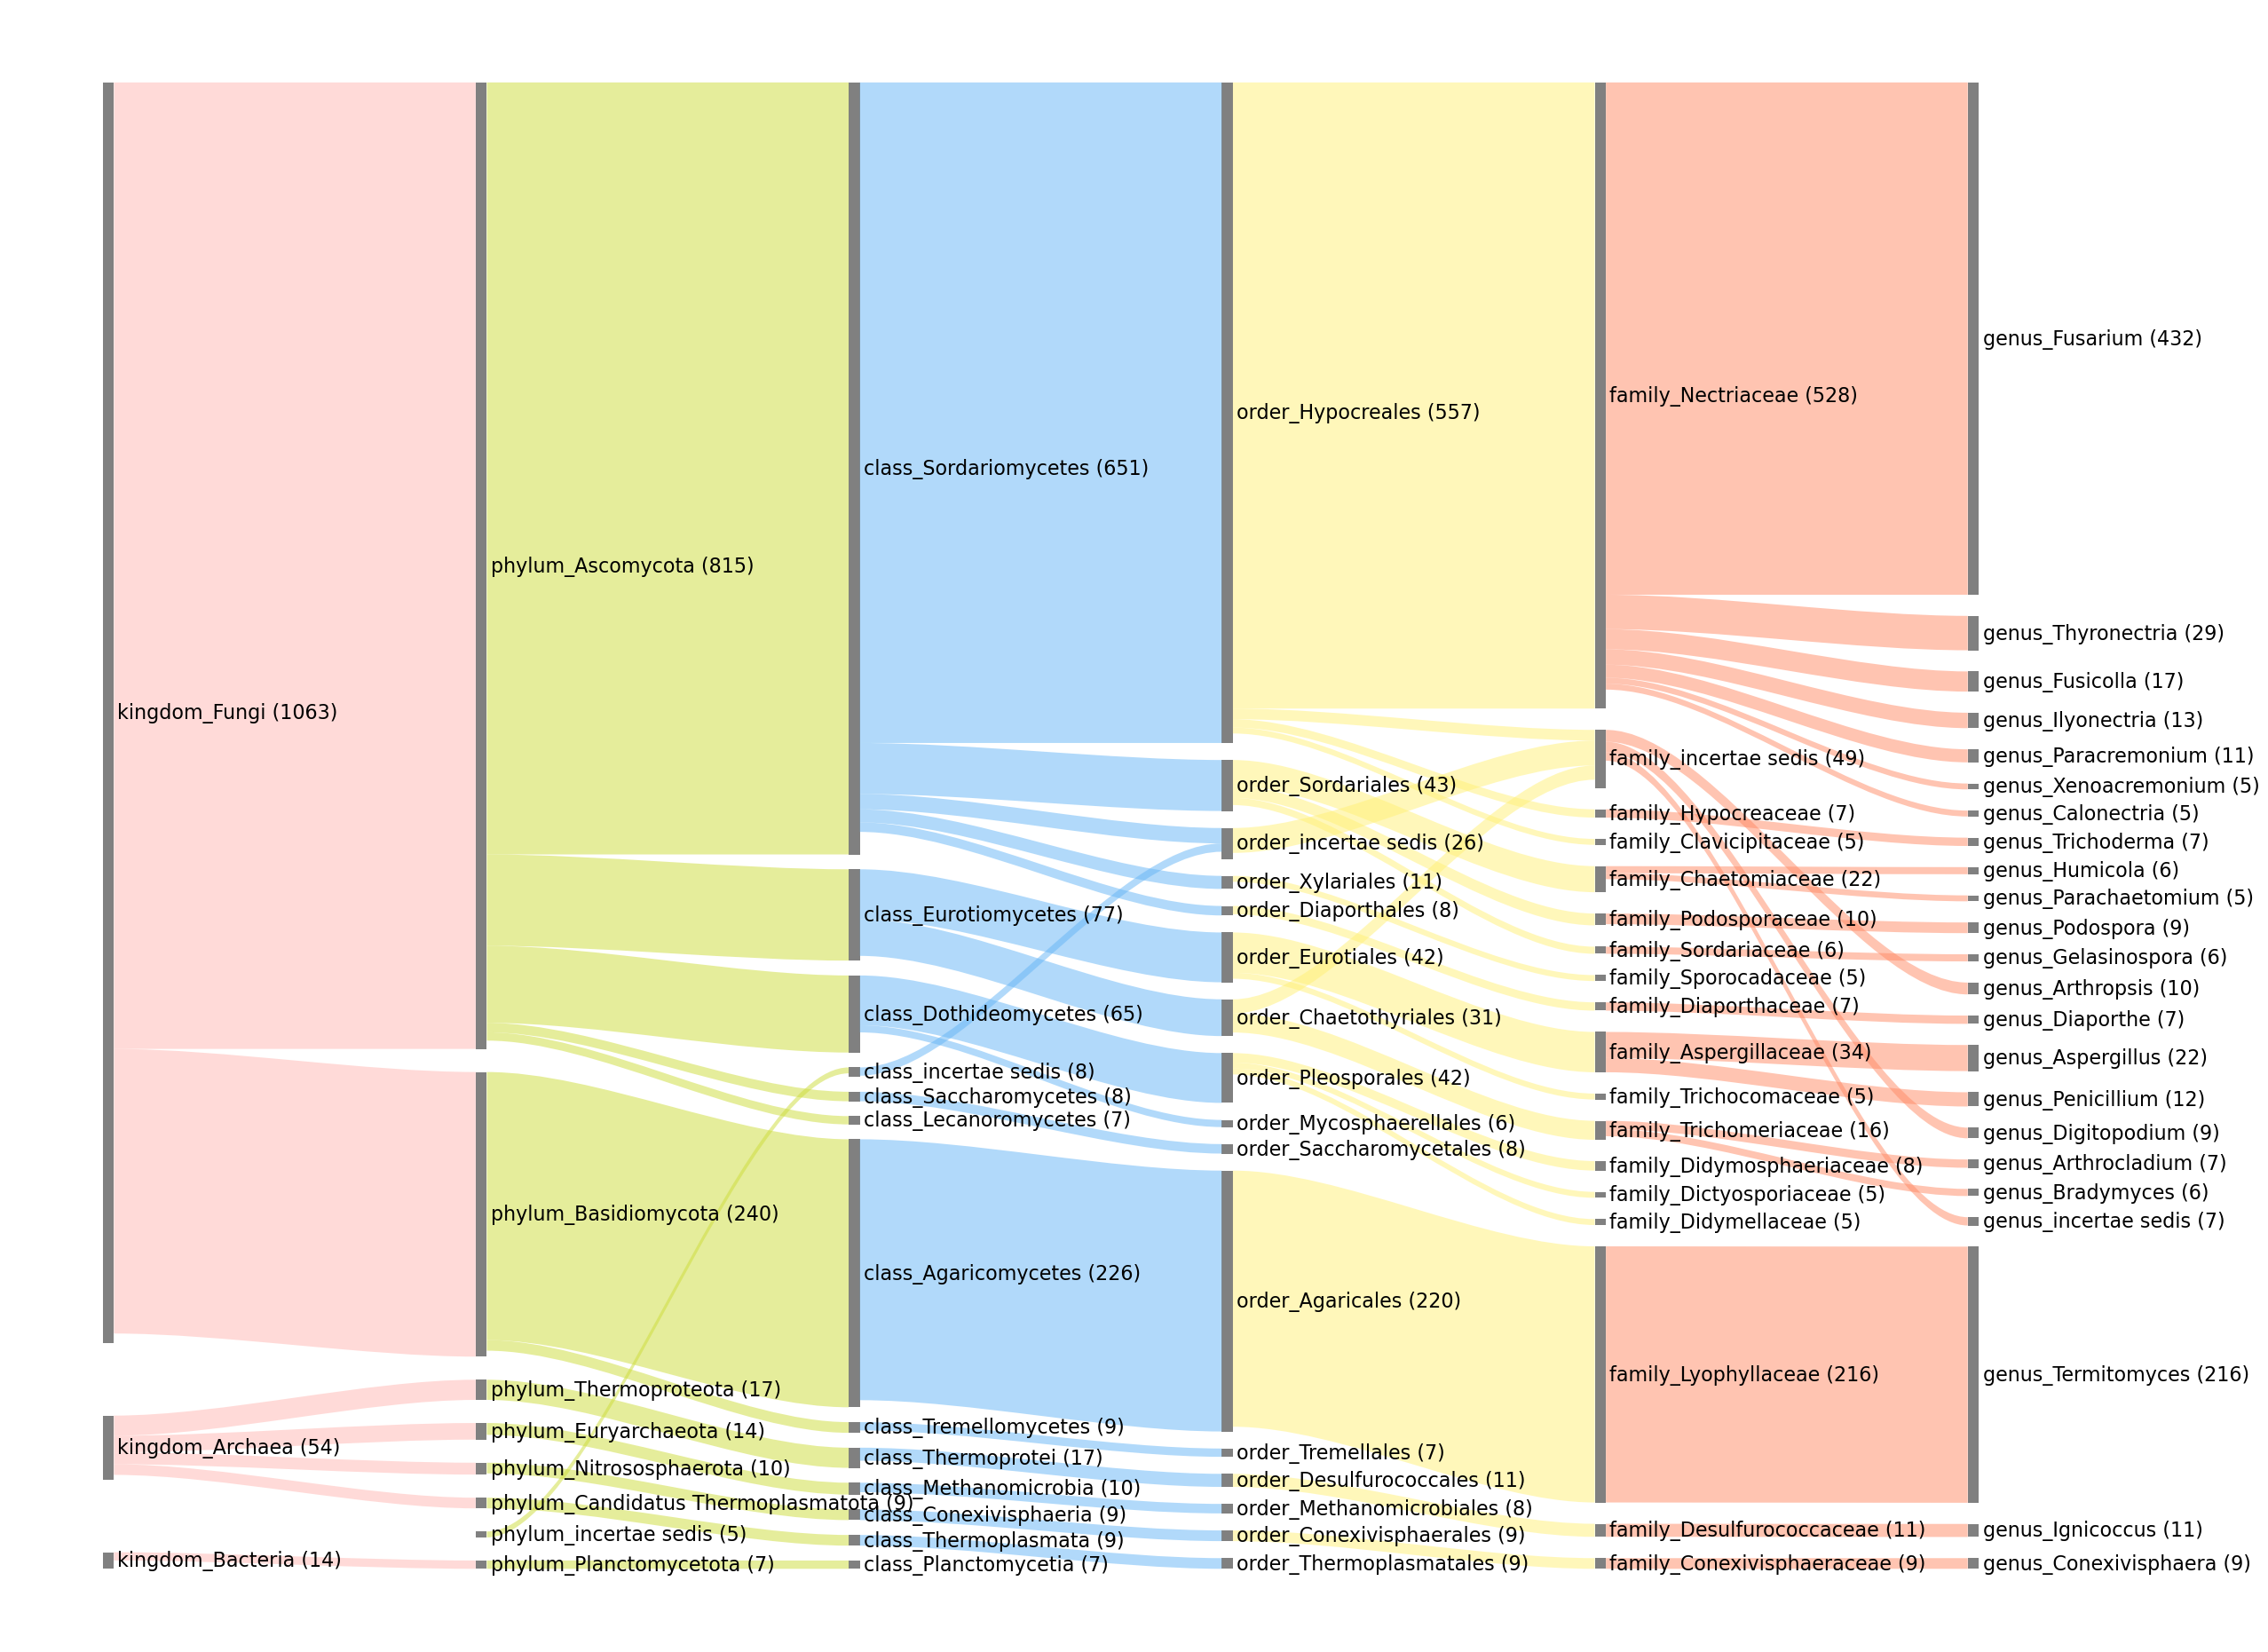

In [338]:
dumb.custom_taxonomy_sankey(src = 'H:/.shortcut-targets-by-id/1WnGFHa0-vc2vLzaAJo35bTJFd5crkDy-/Data/2023-000009_JHOAD1/4_2_taxonomy_lca', 
                            des = './data/taxonomy_assigned/',
                            minimal_reads=5,
                            vertical_scale=1.3)

In [ ]:
dumb.singlebar(src="./data/1_nanofilt/10000.fastq",
               des="./data/2_singlebar/",
               BARCODE_INDEX_FILE="./data/1_nanofilt/2023000003_barcode.tsv", 
               mismatch_ratio_f = 0.15,
               mismatch_ratio_r = 0.15, 
               expected_length_variation = 2, 
               search_range=150)

In [ ]:
orientation = dumb.orientation(src='./data/2_singlebar/',
                               des='./data/3_orientation/',
                                input_format = "fastq",
                                output_format = "both",
                               BARCODE_INDEX_FILE="./data/1_nanofilt/2023000003_barcode.tsv",
                               search_region=200,
                                FwPrimer = "FwPrimer",
                                RvPrimer = "RvPrimer",
                                )

In [ ]:
dumb.trim_reads( 
                   src="./data/3_orientation/", 
                   des="./data/4_trim_table/",
                   mode="table",
                   input_format="fastq",
                    output_format="both",
                    BARCODE_INDEX_FILE = "./data/1_nanofilt/2023000003_barcode.tsv",
                    fw_col = "FwPrimer",rv_col = "RvPrimer",
                    fw_offset = 0, rv_offset = 0,
                    mismatch_ratio_f = 0.15,mismatch_ratio_r = 0.15,
                    discard_no_match = False,
                    check_both_directions = True,
                    reverse_complement_rv = True,
                     )

In [45]:
dumb.mmseqs_cluster(   src="./data/5_selected_for_clust/", 
                       des="./data/6_mmseqs/",
                       mmseqs="/nanoact/bin/mmseqs", 
                       input_format = "fastq",
                       output_format = "both",
                       min_seq_id=0.5, cov_mode=0, k=14, 
                       threads=8, s=7.5, 
                       cluster_mode='linclust', min_read_num = 0,
                       suppress_out=True)

Clustering 2378.fastq
Number of clusters 6
Clustering 2379.fastq
Number of clusters 4


'./data/6_mmseqs/'

In [63]:
dumb.vsearch_OTUs(src="./data/5_selected_for_clust/", 
                    des="./data/6_vsearch/",
                     input_format = "fastq",
                     output_format = "both",
                     vsearch="/nanoact/bin/vsearch", 
                     id=0.9)

Clustering 2378.fastq
Clustering 2379.fastq


In [9]:
dumb.cd_hit_est(src="./data/5_selected_for_clust/", 
                    des="./data/6_cd_hit/", 
                   input_format = "fastq",
                   output_format = "both",                   
                   cd_hit_est="./nanoact/bin/cd-hit-est", 
                   id=0.8, n=5)

Clustering 2378.fastq
Clustering 2379.fastq


In [14]:
dumb.hdbscan( 
              src="./data/5_selected_for_clust/", 
                    des="./data/6_hdbscan/", 
                input_format = "fastq",
                output_format = "both",
                min_cluster_size = 0.1, mds = True)

Clustering 2378.fastq
Number of records: 17
abs_cluster_size:  2
Number of clusters: 3
Clustering 2379.fastq
Number of records: 7
abs_cluster_size:  2
Number of clusters: 1


In [33]:
dumb.taxonomy_assign(src="./data/trimmed/",
                        des="./data/taxonomy/",
)

Getting taxinfo for each record...
6/6 taxid processed...
Merging custom database and ref_db...


0

In [ ]:
importlib.reload(nanoact)
dumb = nanoact.NanoAct()
dumb.taxonomy_assign_visualizer(src="./data/taxonomy_assigned/",
                                des = "./data/taxonomy_assigned/",
                                minimal_reads = 2,
                                )